# 5.1 基于Logistic回归和Sigmoid函数的分类

$$
\sigma(z)=\frac{1}{1+\mathrm{e}^{-z}}
$$

# 5.2 基于最优化方法的最佳回归系数确定

$$z=w_0x_0+w_1x_1+w_2x_2+\cdots+w_nx_n$$

$$z=w^Tx$$

## 5.2.1 梯度上升法

$$w:=w+\alpha\nabla_w f(w)$$

## 5.2.2 训练算法：使用梯度上升找到最佳参数

**程序清单5-1** Logistic回归梯度上升优化算法

In [1]:
from numpy import *

In [2]:
def load_data_set():
    data_mat = []
    label_mat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        line_arr = line.strip().split()
        data_mat.append([1.0, float(line_arr[0]), float(line_arr[1])])
        label_mat.append(int(line_arr[2]))
    return data_mat, label_mat

def sigmoid(inX):
    return 1.0/(1+exp(-inX))

def grad_ascent(data_mat_in, class_labels):
    data_matrix = mat(data_mat_in)
    label_mat = mat(class_labels).transpose()
    m, n = shape(data_matrix)
    alpha = 0.001
    max_cycles = 500
    weights = ones((n,1))
    for k in range(max_cycles):
        h = sigmoid(data_matrix * weights)
        error = (label_mat - h)
        weights = weights + alpha * data_matrix.transpose() * error
    return weights

In [3]:
data_arr, label_mat = load_data_set()

In [4]:
weights = grad_ascent(data_arr, label_mat)
weights

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

## 5.2.3 分析数据：画出决策边界

In [5]:
%matplotlib inline

**程序清单5-2** 画出数据集和Logistic回归最佳拟合直线的函数

In [6]:
def plot_best_fit(weights):
    import matplotlib.pyplot as plt
    data_mat, label_mat = load_data_set()
    data_arr = array(data_mat)
    n = shape(data_arr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(label_mat[i]) == 1:
            xcord1.append(data_arr[i,1])
            ycord1.append(data_arr[i,2])
        else:
            xcord2.append(data_arr[i,1])
            ycord2.append(data_arr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

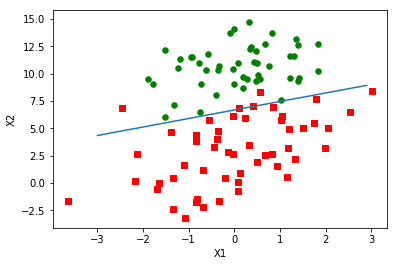

In [7]:
plot_best_fit(weights.getA())

## 5.2.4 训练算法：随机梯度上升

**程序清单5-3** 随机梯度上升算法

In [8]:
def stoc_grad_ascent0(data_matrix, class_labels):
    m,n = shape(data_matrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(data_matrix[i] * weights))
        error = class_labels[i] - h
        weights = weights + alpha * error * data_matrix[i]
    return weights

In [9]:
data_arr, label_mat = load_data_set()

In [10]:
weights = stoc_grad_ascent0(array(data_arr), label_mat)

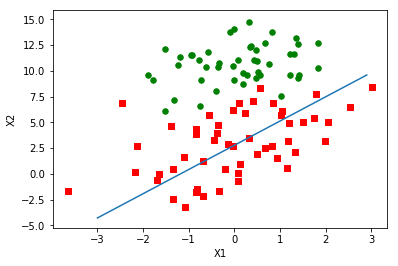

In [11]:
plot_best_fit(weights)

**程序清单5-4** 改进的随机梯度上升算法

In [12]:
def stoc_grad_ascent1(data_matrix, class_labels, num_iter=150):
    m,n = shape(data_matrix)
    weights = ones(n)
    for j in range(num_iter):
        data_index = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01
            rand_index = int(random.uniform(0, len(data_index)))
            h = sigmoid(sum(data_matrix[rand_index] * weights))
            error = class_labels[rand_index] - h
            weights = weights + alpha * error * data_matrix[rand_index]
            del(data_index[rand_index])
    return weights

In [13]:
data_arr, label_mat = load_data_set()

In [14]:
weights = stoc_grad_ascent1(array(data_arr), label_mat)

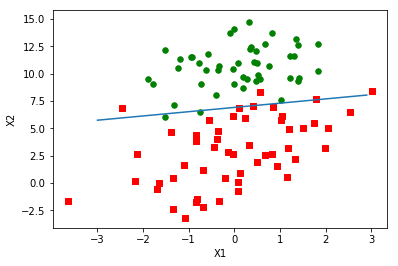

In [15]:
plot_best_fit(weights)

In [16]:
weights = stoc_grad_ascent1(array(data_arr), label_mat, 500)

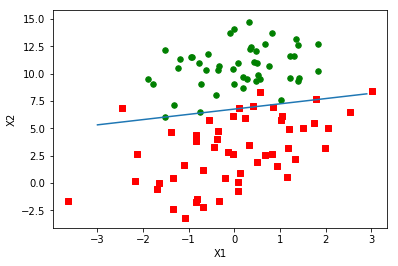

In [17]:
plot_best_fit(weights)

# 5.3 从疝气病症预测病马的死亡率

## 5.3.1 准备数据：处理数据中的缺失值

## 5.3.2 测试算法：用Logistic回归进行分类

**程序清单5-5** Logistic回归分类函数

In [18]:
def classify_vector(inX, weights):
    prob = sigmoid(sum(inX * weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0
    
def colic_test():
    fr_train = open('horseColicTraining.txt')
    fr_test = open('horseColicTest.txt')
    training_set = []
    training_labels = []
    for line in fr_train.readlines():
        curr_line = line.strip().split('\t')
        line_arr = []
        for i in range(21):
            line_arr.append(float(curr_line[i]))
        training_set.append(line_arr)
        training_labels.append(float(curr_line[21]))
    train_weights = stoc_grad_ascent1(array(training_set),
                                     training_labels, 500)
    error_count = 0
    num_test_vec = 0
    for line in fr_test.readlines():
        num_test_vec += 1.0
        curr_line = line.strip().split('\t')
        line_arr = []
        for i in range(21):
            line_arr.append(float(curr_line[i]))
        if int(classify_vector(array(line_arr), train_weights)) != int(curr_line[21]):
            error_count += 1
    error_rate = (float(error_count)/num_test_vec)
    print('The error rate of this test is: {}'.format(error_rate))
    return error_rate

def multi_test():
    num_tests = 10
    error_sum = 0.0
    for k in range(num_tests):
        error_sum += colic_test()
    print('After {} iterations the average error rate is: {}'\
         .format(num_tests, error_sum/float(num_tests)))

In [19]:
multi_test()

C:\Users\xieyu\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: overflow encountered in exp


The error rate of this test is: 0.3880597014925373
The error rate of this test is: 0.40298507462686567
The error rate of this test is: 0.373134328358209
The error rate of this test is: 0.373134328358209
The error rate of this test is: 0.373134328358209
The error rate of this test is: 0.373134328358209
The error rate of this test is: 0.417910447761194
The error rate of this test is: 0.3582089552238806
The error rate of this test is: 0.3880597014925373
The error rate of this test is: 0.2537313432835821
After 10 iterations the average error rate is: 0.3701492537313433


# 5.4 本章小结